In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# navigate to target dir
cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [3]:
cd Genre\ Prediction\ using\ Movie\ posters\ \(Multilabel\ classification\)

/content/gdrive/My Drive/Genre Prediction using Movie posters (Multilabel classification)


In [4]:
!unzip Multi_Label_dataset.zip

Archive:  Multi_Label_dataset.zip
   creating: Multi_Label_dataset/
  inflating: Multi_Label_dataset/train.csv  
   creating: Multi_Label_dataset/Images/
  inflating: Multi_Label_dataset/Images/tt0095159.jpg  
  inflating: Multi_Label_dataset/Images/tt0094980.jpg  
  inflating: Multi_Label_dataset/Images/tt0094964.jpg  
  inflating: Multi_Label_dataset/Images/tt0094907.jpg  
  inflating: Multi_Label_dataset/Images/tt0094884.jpg  
  inflating: Multi_Label_dataset/Images/tt0094869.jpg  
  inflating: Multi_Label_dataset/Images/tt0094862.jpg  
  inflating: Multi_Label_dataset/Images/tt0094746.jpg  
  inflating: Multi_Label_dataset/Images/tt0094739.jpg  
  inflating: Multi_Label_dataset/Images/tt0094731.jpg  
  inflating: Multi_Label_dataset/Images/tt0094651.jpg  
  inflating: Multi_Label_dataset/Images/tt0094606.jpg  
  inflating: Multi_Label_dataset/Images/tt0094594.jpg  
  inflating: Multi_Label_dataset/Images/tt0093744.jpg  
  inflating: Multi_Label_dataset/Images/tt0094208.jpg  
  infl

In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
train = pd.read_csv('Multi_Label_dataset/train.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [0]:
train.drop([6342],inplace=True) # image seems to be corrupt

In [8]:
# load images
train_image = []
for i in tqdm(range(train.shape[0])):
  if(i!=6342):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7253/7253 [00:46<00:00, 157.54it/s]


In [9]:
X.shape

(7252, 150, 150, 3)

['Comedy']


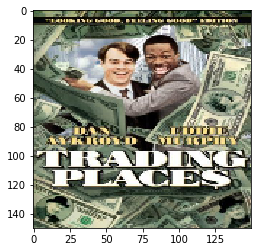

In [10]:
print(train['Genre'][2])
plt.imshow(X[2])

In [11]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7253, 25)

In [0]:
y1 = y[:6342]
y2 = y[6343:]
y = list(y1)+list(y2)

In [13]:
y = np.array(y)
y.shape

(7252, 25)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [15]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 34, 32)        0         


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 6526 samples, validate on 726 samples
Epoch 1/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2496 - acc: 0.9072 - val_loss: 0.2426 - val_acc: 0.9066
Epoch 2/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2486 - acc: 0.9071 - val_loss: 0.2412 - val_acc: 0.9075
Epoch 3/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2470 - acc: 0.9074 - val_loss: 0.2411 - val_acc: 0.9072
Epoch 4/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2453 - acc: 0.9074 - val_loss: 0.2392 - val_acc: 0.9053
Epoch 5/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2449 - acc: 0.9078 - val_loss: 0.2393 - val_acc: 0.9066
Epoch 6/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2434 - acc: 0.9085 - val_loss: 0.2388 - val_acc: 0.9073
Epoch 7/10
6526/6526 [==============================] - 9s 1ms/step - loss: 0.2434 - acc: 0.9086 - val_loss: 0.2386 - val_acc: 0.9070
Epoch 8/10
6526

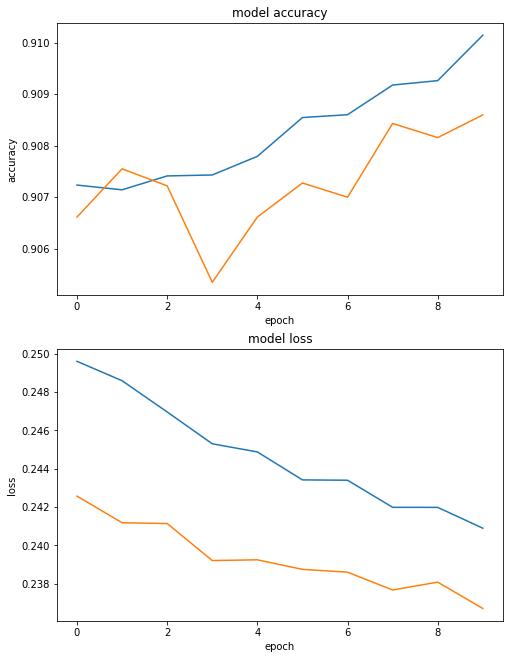

In [21]:
# plot the results
plt.figure(1, figsize=(8, 11))

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
img = image.load_img('GOT.jpg',target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255

Drama (0.514)
Action (0.286)
Thriller (0.24)


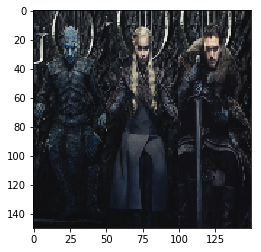

In [23]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,150,150,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)